In [43]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
df_hotel = pd.read_csv('C:/Users/btt38/Downloads/hotel_bookings.csv/hotel_bookings.csv')

In [45]:
print(f'Dữ liệu gồm: {(df_hotel.shape[0]):,} dòng và {df_hotel.shape[1]} cột')
df_hotel.head()

Dữ liệu gồm: 119,390 dòng và 32 cột


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [46]:
df_hotel['agent'] = df_hotel['agent'].fillna(0)
df_hotel['company'] = df_hotel['company'].fillna(0)
df_hotel['children'] = df_hotel['children'].fillna(0)

In [47]:
df_hotel[df_hotel.duplicated() == True].shape
df_hotel.drop_duplicates(keep='first',inplace=True)

In [48]:
print(f'Dữ liệu gồm: {(df_hotel.shape[0]):,} dòng và {df_hotel.shape[1]} cột')
df_hotel.head()

Dữ liệu gồm: 87,396 dòng và 32 cột


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


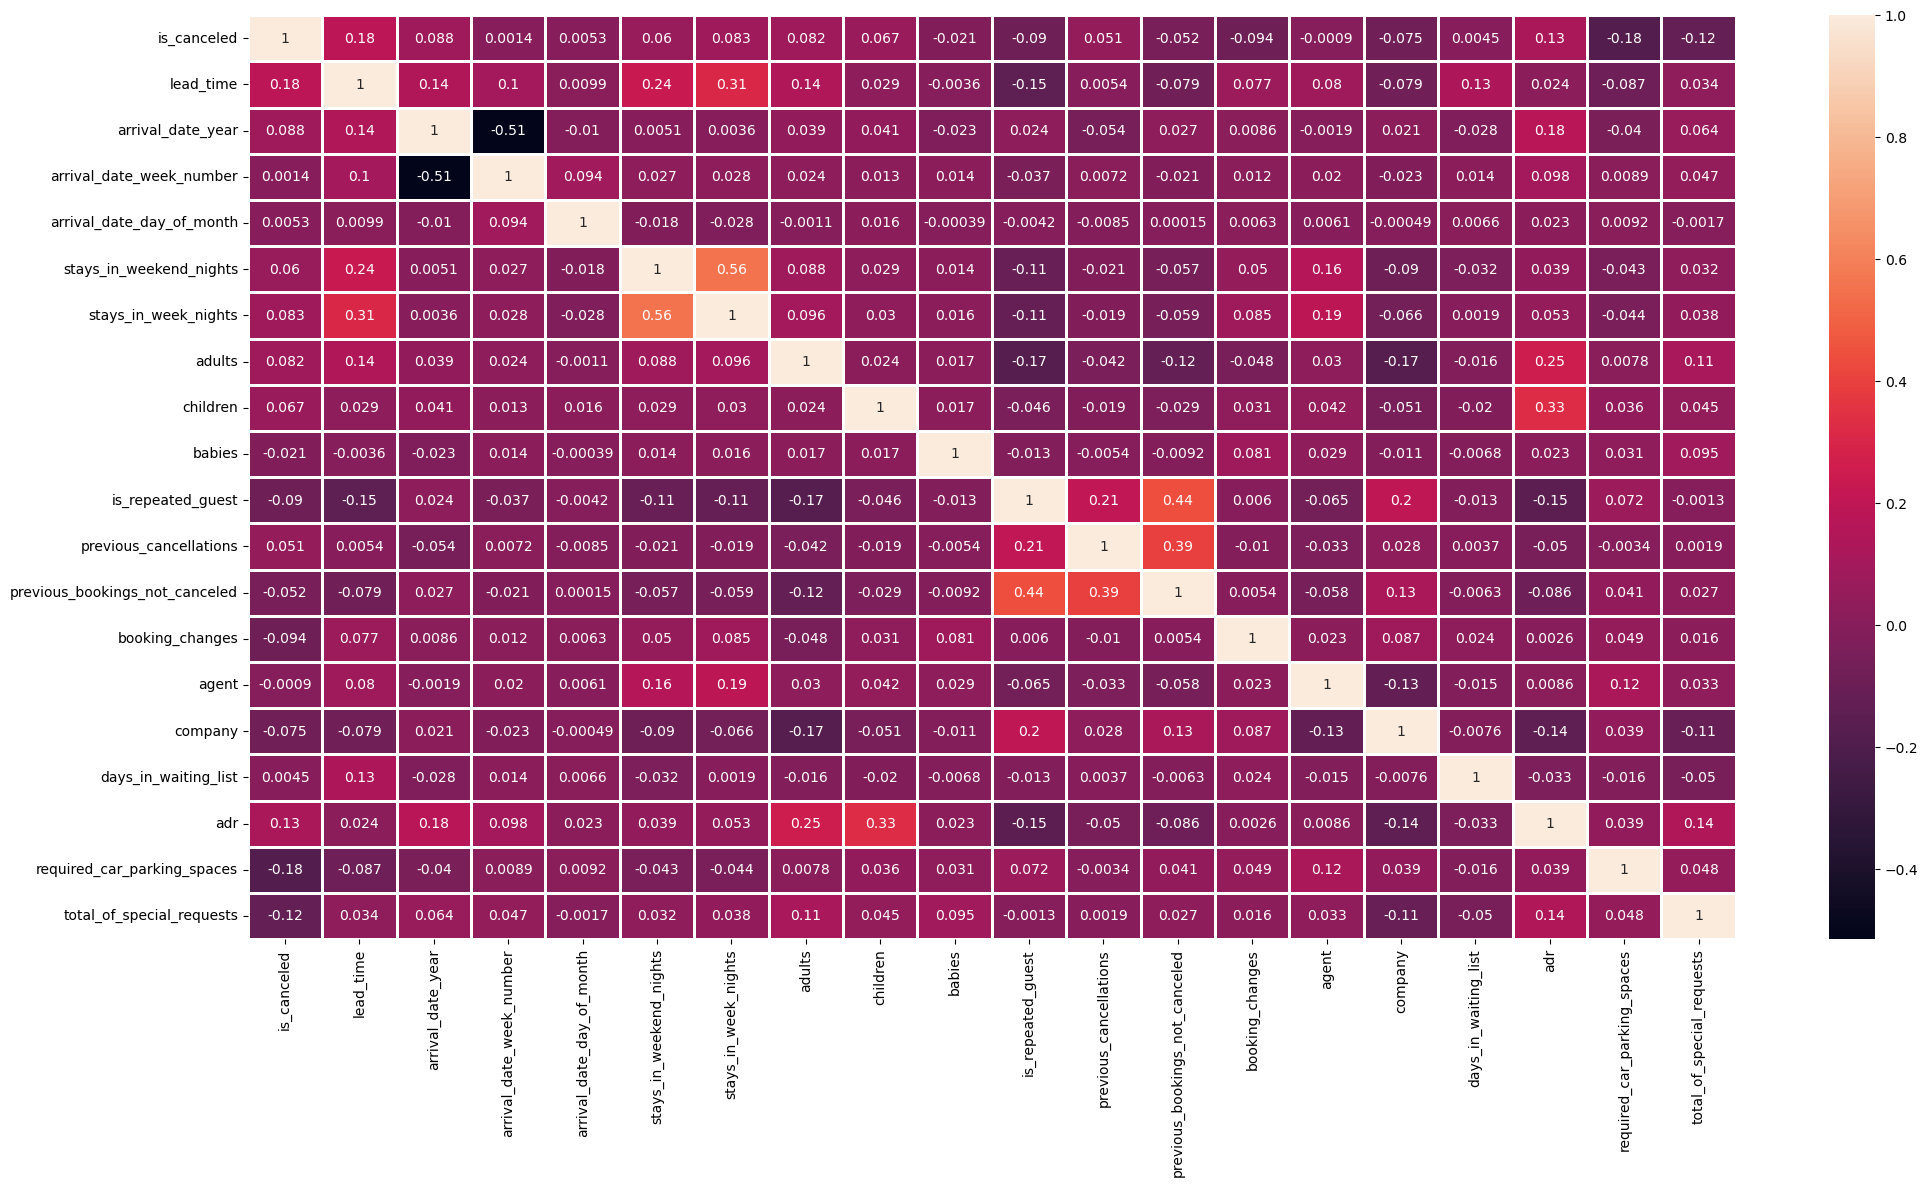

In [49]:
plt.figure(figsize = (24, 12))

corr = df_hotel.corr()
sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()

In [50]:
correlation = df_hotel.corr()['is_canceled'].abs().sort_values(ascending = False)
correlation

is_canceled                       1.000000
lead_time                         0.184806
required_car_parking_spaces       0.184206
adr                               0.127986
total_of_special_requests         0.120545
booking_changes                   0.093644
is_repeated_guest                 0.089643
arrival_date_year                 0.088030
stays_in_week_nights              0.082928
adults                            0.081816
company                           0.074758
children                          0.067369
stays_in_weekend_nights           0.060191
previous_bookings_not_canceled    0.052154
previous_cancellations            0.051468
babies                            0.020543
arrival_date_day_of_month         0.005328
days_in_waiting_list              0.004464
arrival_date_week_number          0.001443
agent                             0.000900
Name: is_canceled, dtype: float64

In [51]:
useless_col = ['days_in_waiting_list', 'arrival_date_year', 'arrival_date_year', 'assigned_room_type', 'booking_changes',
               'reservation_status', 'country', 'days_in_waiting_list','agent','company','adr']

df_hotel_lr = df_hotel.drop(useless_col, axis = 1)

In [52]:
df_hotel_lr

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,deposit_type,customer_type,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,Resort Hotel,0,342,July,27,1,0,0,2,0.0,...,Direct,0,0,0,C,No Deposit,Transient,0,0,2015-07-01
1,Resort Hotel,0,737,July,27,1,0,0,2,0.0,...,Direct,0,0,0,C,No Deposit,Transient,0,0,2015-07-01
2,Resort Hotel,0,7,July,27,1,0,1,1,0.0,...,Direct,0,0,0,A,No Deposit,Transient,0,0,2015-07-02
3,Resort Hotel,0,13,July,27,1,0,1,1,0.0,...,Corporate,0,0,0,A,No Deposit,Transient,0,0,2015-07-02
4,Resort Hotel,0,14,July,27,1,0,2,2,0.0,...,TA/TO,0,0,0,A,No Deposit,Transient,0,1,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,August,35,30,2,5,2,0.0,...,TA/TO,0,0,0,A,No Deposit,Transient,0,0,2017-09-06
119386,City Hotel,0,102,August,35,31,2,5,3,0.0,...,TA/TO,0,0,0,E,No Deposit,Transient,0,2,2017-09-07
119387,City Hotel,0,34,August,35,31,2,5,2,0.0,...,TA/TO,0,0,0,D,No Deposit,Transient,0,4,2017-09-07
119388,City Hotel,0,109,August,35,31,2,5,2,0.0,...,TA/TO,0,0,0,A,No Deposit,Transient,0,0,2017-09-07


In [53]:
# creating numerical and categorical dataframes

cat_cols = [col for col in df_hotel_lr.columns if df_hotel_lr[col].dtype == 'O']
cat_cols

['hotel',
 'arrival_date_month',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status_date']

In [54]:
cat_df = df_hotel_lr[cat_cols].copy()
cat_df.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_date
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient,2015-07-02
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,2015-07-02
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,2015-07-03


In [55]:
cat_df['reservation_status_date'] = cat_df.apply(lambda x: pd.to_datetime(x['reservation_status_date']),axis=1)

In [56]:
cat_df['year'] = cat_df['reservation_status_date'].dt.year
cat_df['month'] = cat_df['reservation_status_date'].dt.month
cat_df['day'] = cat_df['reservation_status_date'].dt.day

In [57]:
cat_df.drop(['reservation_status_date','arrival_date_month'] , axis = 1, inplace = True)
cat_df.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
0,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1
1,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1
2,Resort Hotel,BB,Direct,Direct,A,No Deposit,Transient,2015,7,2
3,Resort Hotel,BB,Corporate,Corporate,A,No Deposit,Transient,2015,7,2
4,Resort Hotel,BB,Online TA,TA/TO,A,No Deposit,Transient,2015,7,3


In [58]:
columns_convert = ['hotel', 'meal', 'market_segment', 'distribution_channel',
       'reserved_room_type', 'deposit_type', 'customer_type', 'year']

dict_map = {
  'hotel':{'Resort Hotel': 0, 'City Hotel': 1}, 
  'meal':{'BB': 0, 'FB': 1, 'HB': 2, 'SC': 3, 'Undefined': 4}, 
  'market_segment':{'Direct': 0, 'Corporate': 1, 'Online TA': 2, 'Offline TA/TO': 3, 'Complementary': 4, 'Groups': 5, 'Undefined': 6, 'Aviation': 7}, 
  'distribution_channel':{'Direct': 0, 'Corporate': 1, 'TA/TO': 2, 'Undefined': 3, 'GDS': 4},
  'reserved_room_type':{'C': 0, 'A': 1, 'D': 2, 'E': 3, 'G': 4, 'F': 5, 'H': 6, 'L': 7, 'P': 8, 'B': 9}, 
  'deposit_type':{'No Deposit': 0, 'Refundable': 1, 'Non Refund': 2}, 
  'customer_type':{'Transient': 0, 'Contract': 1, 'Transient-Party': 2, 'Group': 3}, 
  'year':{2015: 0, 2014: 1, 2016: 2, 2017: 3},
}

for col in columns_convert:
  cat_df[col] = cat_df[col].map(dict_map[col])

In [59]:
num_df = df_hotel_lr.drop(columns = cat_cols, axis = 1)
num_df.drop('is_canceled', axis = 1, inplace = True)
num_df

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,required_car_parking_spaces,total_of_special_requests
0,342,27,1,0,0,2,0.0,0,0,0,0,0,0
1,737,27,1,0,0,2,0.0,0,0,0,0,0,0
2,7,27,1,0,1,1,0.0,0,0,0,0,0,0
3,13,27,1,0,1,1,0.0,0,0,0,0,0,0
4,14,27,1,0,2,2,0.0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,23,35,30,2,5,2,0.0,0,0,0,0,0,0
119386,102,35,31,2,5,3,0.0,0,0,0,0,0,2
119387,34,35,31,2,5,2,0.0,0,0,0,0,0,4
119388,109,35,31,2,5,2,0.0,0,0,0,0,0,0


In [60]:
num_df.var()

lead_time                         7405.002696
arrival_date_week_number           186.993911
arrival_date_day_of_month           78.059813
stays_in_weekend_nights              1.064862
stays_in_week_nights                 4.217207
adults                               0.392503
children                             0.207819
babies                               0.012904
is_repeated_guest                    0.037549
previous_cancellations               0.136268
previous_bookings_not_canceled       2.999456
required_car_parking_spaces          0.079261
total_of_special_requests            0.692134
dtype: float64

In [61]:
# normalizing numerical variables

num_df['lead_time'] = np.log(num_df['lead_time'] + 1)
num_df['arrival_date_week_number'] = np.log(num_df['arrival_date_week_number'] + 1)
num_df['arrival_date_day_of_month'] = np.log(num_df['arrival_date_day_of_month'] + 1)

In [62]:
X = pd.concat([cat_df, num_df], axis = 1)
y = df_hotel_lr['is_canceled']

In [64]:
from sklearn import neighbors#, datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

                                                    
print("Training size: %d" %len(y_train))
print("Test size : %d" %len(y_test))


Training size: 61177
Test size : 26219


In [113]:
clf = neighbors.KNeighborsClassifier(n_neighbors = 3, p = 2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
print ("Accuracy of 3NN: %.2f %%" %(100*accuracy_score(y_test, y_pred)))


Accuracy of 3NN: 86.10 %


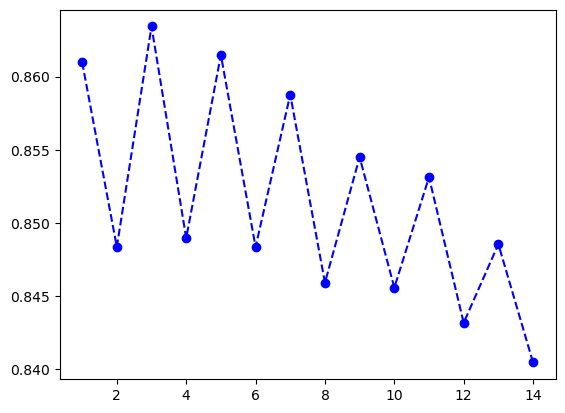

In [67]:
import matplotlib.pyplot as plt
accuracy_vals = []
for i in range(1,15):
    clf = neighbors.KNeighborsClassifier(n_neighbors =i , p = 2)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy_vals.append(accuracy_score(y_test, y_pred))
plt.plot(range(1,15), accuracy_vals, color='blue', marker='o', linestyle='dashed' )

In [ ]:
from sklearn.metrics import accuracy_score
print ("Accuracy of 3NN: %.2f %%" %(100*accuracy_score(y_test, y_pred)))

In [114]:
input_customer = {
  'hotel':['Resort Hotel'],                
  'meal':['BB'],                           
  'market_segment':['Online TA'],                  
  'distribution_channel':['TA/TO'],            
  'reserved_room_type':['C'],             
  'deposit_type':['No Deposit'],                    
  'customer_type':['Transient'],                   
  'year':[2015],                            
  'month':[5],                          
  'day':[6],                            
  'lead_time':[85],                       
  'arrival_date_week_number':[27],        
  'arrival_date_day_of_month':[1],       
  'stays_in_weekend_nights':[0],         
  'stays_in_week_nights':[3],            
  'adults':[2],                          
  'children':[0],                        
  'babies':[0],                          
  'is_repeated_guest':[0],               
  'previous_cancellations':[0],          
  'previous_bookings_not_canceled':[0], 
  'required_car_parking_spaces':[2],     
  'total_of_special_requests':[1],      
}

input_df = pd.DataFrame(input_customer)

input_df['lead_time'] = np.log(input_df['lead_time'] + 1)
input_df['arrival_date_week_number'] = np.log(input_df['arrival_date_week_number'] + 1)
input_df['arrival_date_day_of_month'] = np.log(input_df['arrival_date_day_of_month'] + 1)

columns_convert = ['hotel', 'meal', 'market_segment', 'distribution_channel',
       'reserved_room_type', 'deposit_type', 'customer_type', 'year']

dict_map = {
  'hotel':{'Resort Hotel': 0, 'City Hotel': 1}, 
  'meal':{'BB': 0, 'FB': 1, 'HB': 2, 'SC': 3, 'Undefined': 4}, 
  'market_segment':{'Direct': 0, 'Corporate': 1, 'Online TA': 2, 'Offline TA/TO': 3, 'Complementary': 4, 'Groups': 5, 'Undefined': 6, 'Aviation': 7}, 
  'distribution_channel':{'Direct': 0, 'Corporate': 1, 'TA/TO': 2, 'Undefined': 3, 'GDS': 4},
  'reserved_room_type':{'C': 0, 'A': 1, 'D': 2, 'E': 3, 'G': 4, 'F': 5, 'H': 6, 'L': 7, 'P': 8, 'B': 9}, 
  'deposit_type':{'No Deposit': 0, 'Refundable': 1, 'Non Refund': 2}, 
  'customer_type':{'Transient': 0, 'Contract': 1, 'Transient-Party': 2, 'Group': 3}, 
  'year':{2015: 0, 2014: 1, 2016: 2, 2017: 3},
}

for col in columns_convert:
  input_df[col] = input_df[col].map(dict_map[col])

In [116]:
y_pred_knn = clf.predict_proba(input_df)

print(f"Tỉ lệ hủy phòng của đơn này là Có : {round((y_pred_knn[0][1])*100,2)} % \n Không : {round(y_pred_knn[0][0]*100,2)} %")

Tỉ lệ hủy phòng của đơn này là Có : 66.67 % 
 Không : 33.33 %
